In [1]:
#2.2 Implementation
#1. (a)
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la

In [2]:
#(b)
LeftX = 0.0
RightX = 10.0
LeftY = 0.0
RightY = 5.0
Nx = 4 # number of intervals in x-direction
Ny = 4 # number of intervals in y-direction
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction

[[ 1.6  -0.16  0.   -0.64  0.    0.    0.    0.    0.  ]
 [-0.16  1.6  -0.16  0.   -0.64  0.    0.    0.    0.  ]
 [ 0.   -0.16  1.44  0.    0.   -0.64  0.    0.    0.  ]
 [-0.64  0.    0.    1.6  -0.16  0.   -0.64  0.    0.  ]
 [ 0.   -0.64  0.   -0.16  1.6  -0.16  0.   -0.64  0.  ]
 [ 0.    0.   -0.64  0.   -0.16  1.44  0.    0.   -0.64]
 [ 0.    0.    0.   -0.64  0.    0.    0.96 -0.16  0.  ]
 [ 0.    0.    0.    0.   -0.64  0.   -0.16  0.96 -0.16]
 [ 0.    0.    0.    0.    0.   -0.64  0.   -0.16  0.8 ]]
(3, 3)


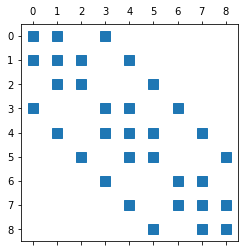

In [3]:
#(c)
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
Dx=sp.diags([1/dx, -1/dx],[0,-1], shape= (Nx-1,Nx-1))
Dy=sp.diags([1/dy, -1/dy],[0,-1], shape= (Ny-1,Ny-1))
DxT=Dx.transpose()
DyT=Dy.transpose()
Lxx=DxT.dot(Dx)
Lyy=DyT.dot(Dy)
Ix=sp.eye(Nx-1,Nx-1,0)
Iy=sp.eye(Ny-1,Ny-1,0)
A=sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)
plt.spy(A)
print(A.toarray())
print(np.shape(Dx))

In [4]:
#(d)
def FDLaplacian2D(LeftX, RightX, LeftY, RightY, Nx, Ny):
    dx = (RightX-LeftX)/Nx # grid step in x-direction
    dy =(RightY-LeftY)/Ny # grid step in y-direction
    Dx=sp.diags([1/dx, -1/dx],[0,-1], shape= (Nx-1,Nx-1))
    Dy=sp.diags([1/dy, -1/dy],[0,-1], shape= (Ny-1,Ny-1))
    DxT=Dx.transpose()
    DyT=Dy.transpose()
    Lxx=DxT.dot(Dx)
    Lyy=DyT.dot(Dy)
    Ix=sp.eye(Nx-1,Nx-1,0)
    Iy=sp.eye(Ny-1,Ny-1,0)
    A=sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)
    return A
A.toarray()
A=FDLaplacian2D(0.0,10.0,0.0,5.0,200,200)
print(A.toarray())

[[4000. -400.    0. ...    0.    0.    0.]
 [-400. 4000. -400. ...    0.    0.    0.]
 [   0. -400. 4000. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 2400. -400.    0.]
 [   0.    0.    0. ... -400. 2400. -400.]
 [   0.    0.    0. ...    0. -400. 2000.]]


In [5]:
#2. (a)
def sourcefunc(x,y):
    f = 0
    for i in range(int(LeftX+1),int(RightX)):
        for j in range(int(LeftY+1),int(RightY)):
            exponent=-40.0*((x-i)*(x-i)+(y-j)*(y-j))
            f=f+np.exp(exponent)
    return f

In [6]:
#(b)
x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
print(x)
print(y)

[[2.5 2.5 2.5]
 [5.  5.  5. ]
 [7.5 7.5 7.5]]
[[1.25 2.5  3.75]
 [1.25 2.5  3.75]
 [1.25 2.5  3.75]]


In [7]:
#(c)
Nx=200
Ny=100
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
f = sourcefunc(x,y)
print(f)

[[4.40492387e-32 1.78167296e-30 5.90009054e-29 ... 5.90009054e-29
  1.78167296e-30 4.40492387e-32]
 [1.78167296e-30 7.20638686e-29 2.38642758e-27 ... 2.38642758e-27
  7.20638686e-29 1.78167296e-30]
 [5.90009054e-29 2.38642758e-27 7.90276278e-26 ... 7.90276278e-26
  2.38642758e-27 5.90009054e-29]
 ...
 [5.90009054e-29 2.38642758e-27 7.90276278e-26 ... 7.90276278e-26
  2.38642758e-27 5.90009054e-29]
 [1.78167296e-30 7.20638686e-29 2.38642758e-27 ... 2.38642758e-27
  7.20638686e-29 1.78167296e-30]
 [4.40492387e-32 1.78167296e-30 5.90009054e-29 ... 5.90009054e-29
  1.78167296e-30 4.40492387e-32]]


Text(0.5, 1.0, 'Heat map of the source function f')

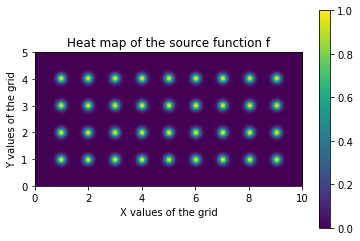

In [8]:
#3. (a)
# visualizing the source function
plt.ion()
plt.figure(1)
plt.clf()
plt.imshow(f.transpose(),extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the source function f')
 # additional commands to make your plot look correct

In [9]:
#(b)
# lexicographic source vector
fLX = np.reshape(f,((Nx-1)*(Ny-1),1)) # reshape 2D f array into 1D fLX array
print(fLX)

[[4.40492387e-32]
 [1.78167296e-30]
 [5.90009054e-29]
 ...
 [5.90009054e-29]
 [1.78167296e-30]
 [4.40492387e-32]]


In [10]:
# (c)
# 2D FD Laplacian on rectangular domain
A = FDLaplacian2D(LeftX, RightX, LeftY, RightY, Nx, Ny)
print(A.toarray())

[[1600. -400.    0. ...    0.    0.    0.]
 [-400. 1600. -400. ...    0.    0.    0.]
 [   0. -400. 1600. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1200. -400.    0.]
 [   0.    0.    0. ... -400. 1200. -400.]
 [   0.    0.    0. ...    0. -400.  800.]]


In [11]:
#(d)
u = la.spsolve(A,fLX)
print(u)

[3.40931240e-04 6.81129128e-04 1.01968344e-03 ... 6.79694907e-01
 6.79686143e-01 6.79680325e-01]


Text(0.5, 1.0, 'Heat map of the vector of the unknowns u')

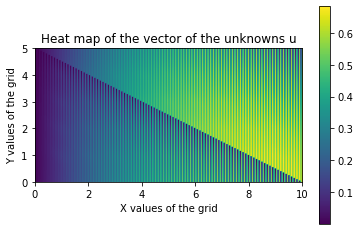

In [12]:
#(e)
# reshaping the solution vector into 2D array
uArr = np.reshape(u,((Nx-1),(Ny-1)))
# visualizing the solution
plt.figure(2)
plt.clf()
plt.imshow(uArr.transpose(), extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the vector of the unknowns u')
# additional commands to make your plot look correct

(199, 99)


AttributeError: 'AxesSubplot' object has no attribute 'gca'

<Figure size 432x288 with 0 Axes>

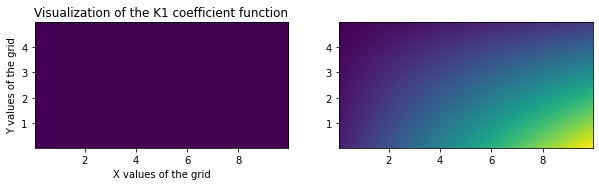

In [29]:
#3.2 Implementation
#1. (a)
def coeffK1(x,y):
    K = 1.0
    return K
def coeffK2(x,y):
    K = 1.0 + 0.1*(x+y+(x*y))
    return K
Nx=200
Ny=100
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
# x=np.linspace(LeftX,RightX,Nx)
# y=np.linspace(LeftY,RightY,Ny)
x,y = np.mgrid[(LeftX+dx):RightX-dx:(Nx-1)*1j, (LeftY+dy): RightY-dy:(Ny-1)*1j]
K1=np.full((Nx-1,Ny-1),coeffK1(x,y))
K2=coeffK2(x,y)
print(np.shape(K2))
plt.clf()
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(10,10))
ax1.imshow(K1.transpose(),extent=[LeftX+dx,RightX-dx, LeftY+dy,RightY-dy], label='Visualization of the K1 coefficient function')
ax1.set_title('Visualization of the K1 coefficient function')
ax1.set_xlabel('X values of the grid')
ax1.set_ylabel('Y values of the grid')
ax2.imshow(K2.transpose(),extent=[LeftX+dx,RightX-dx, LeftY+dy,RightY-dy], label='Visualization of the K2 coefficient function', interpolation='none')
ax2.gca().invert_yaxis()
ax2.set_title('Visualization of the K2 coefficient function')
ax2.set_xlabel('X values of the grid')
ax2.set_ylabel('Y values of the grid')


In [14]:
#(b)
def create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffFun):
    dx = (RightX-LeftX)/Nx # grid step in x-direction
    dy =(RightY-LeftY)/Ny # grid step in y-direction
    x=np.linspace(LeftX,RightX,Nx)
    y=np.linspace(LeftY,RightY,Ny)
#     x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
    diag0=np.zeros((Nx-1)*(Ny-1))
    diagimin1=np.zeros((Nx-1)*(Ny-1)-1)
    diagiplus1=np.zeros((Nx-1)*(Ny-1)-1)
    diagjmin1=np.zeros((Nx-1)*(Ny-1)-(Nx-1))
    diagjplus1=np.zeros((Nx-1)*(Ny-1)-(Nx-1))
    n0=0
    nip1=0
    nim1=0
    njp1=0
    njm1=0
    for j in range(Ny-1):
        for i in range(Nx-1):
            diag0[n0]=(((coeffFun(x[i]-0.5*dx,y[j])+coeffFun(x[i]+0.5*dx,y[j]))/(dx**2))+((coeffFun(x[i],y[j]-0.5*dy)+coeffFun(x[i],y[j]+0.5*dy))/(dy)**2))
            n0=n0+1
            if (i<(Nx-2)):
                diagiplus1[nip1]=((-coeffFun(x[i]+0.5*dx,y[j]))/(dx**2))
                nip1=nip1+1
            elif (i==Nx-2):
                nip1=nip1+1
            if (i>(0)):
                diagimin1[nim1]=((-coeffFun(x[i]-0.5*dx,y[j]))/(dx**2))
                nim1=nim1+1
            elif (i==0) and (j>0):
                nim1=nim1+1
            if (j<(Ny-2)):
                diagjplus1[njp1]=((-coeffFun(x[i],y[j]+0.5*dy)/(dy**2)))
                njp1=njp1+1
            if (j>(0)):
                diagjmin1[njm1]=((-coeffFun(x[i],y[j]-0.5*dy))/(-0.5*dy**2))
                njm1=njm1+1    
#     diag0=np.array(diag0)
#     diagimin1=np.array(diagimin1)
#     diagiplus1=np.array(diagiplus1)
#     diagjmin1=np.array(diagjmin1)
#     diagjplus1=np.array(diagjplus1)
#     diag0=np.reshape(diag0,-1)
#     diagimin1=np.reshape(diagimin1,-1)
#     diagiplus1=np.reshape(diagiplus1,-1)
#     diagjmin1=np.reshape(diagjmin1,-1)
#     diagjplus1=np.reshape(diagjplus1,-1)
    A=sp.diags([diag0, diagimin1, diagiplus1, diagjmin1, diagjplus1] , [0, -1, 1, Nx-1, -Nx+1], shape=((Nx-1)*(Ny-1),(Nx-1)*(Ny-1)) , format='csc')
    return A
# def create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffFun):
#     dx = (RightX-LeftX)/Nx # grid step in x-direction
#     dy =(RightY-LeftY)/Ny # grid step in y-direction
#     x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
#     diag0=[]
#     diagimin1=[]
#     diagiplus1=[]
#     diagjmin1=[]
#     diagjplus1=[]
#     for j in (y):
#         for i in (x):
#             diag0.append(((coeffFun(i-0.5*dx,j)+coeffFun(i+0.5*dx,j))/(dx**2))+((coeffFun(i,j-0.5*dy)+coeffFun(i,j+0.5*dy))/(dy)**2))
#             diagimin1.append((-coeffFun(i-0.5*dx,j))/(dx**2))
#             diagiplus1.append((-coeffFun(i+0.5*dx,j))/(dx**2))
#             diagjmin1.append((-coeffFun(i,j-0.5*dy))/(dy**2))
#             diagjplus1.append((-coeffFun(i,j+0.5*dy))/(dy**2))
#     diag0=np.array(diag0)
#     diagimin1=np.array(diagimin1)
#     diagiplus1=np.array(diagiplus1)
#     diagjmin1=np.array(diagjmin1)
#     diagjplus1=np.array(diagjplus1)
#     diag0=np.reshape(diag0,-1)
#     diagimin1=np.reshape(diagimin1,-1)
#     diagiplus1=np.reshape(diagiplus1,-1)
#     diagjmin1=np.reshape(diagjmin1,-1)
#     diagjplus1=np.reshape(diagjplus1,-1)
#     A=sp.diags([diag0, diagimin1, diagiplus1, diagjmin1, diagjplus1] , [0, -1, 1, Nx-1, -Nx+1], shape=((Nx-1)*(Ny-1),(Nx-1)*(Ny-1)) , format='csc')
#     return A
A = create2DLFVM(4,4,LeftX,RightX,LeftY,RightY,coeffK1)
# with np.printoptions(threshold=np.inf):
#     print(A.toarray())
print(A.toarray())

[[ 1.6  -0.16  0.    1.28  0.    0.    0.    0.    0.  ]
 [-0.16  1.6  -0.16  0.    1.28  0.    0.    0.    0.  ]
 [ 0.   -0.16  1.6   0.    0.    1.28  0.    0.    0.  ]
 [-0.64  0.    0.    1.6  -0.16  0.    1.28  0.    0.  ]
 [ 0.   -0.64  0.   -0.16  1.6  -0.16  0.    1.28  0.  ]
 [ 0.    0.   -0.64  0.   -0.16  1.6   0.    0.    1.28]
 [ 0.    0.    0.   -0.64  0.    0.    1.6  -0.16  0.  ]
 [ 0.    0.    0.    0.   -0.64  0.   -0.16  1.6  -0.16]
 [ 0.    0.    0.    0.    0.   -0.64  0.   -0.16  1.6 ]]


In [15]:
#(c)
Nx=4
Ny=4
A = create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffK2)
print(A.toarray())

[[ 1.6        -0.18        0.          1.41333333  0.          0.
   0.          0.          0.        ]
 [-0.19333333  2.13333333 -0.23333333  0.          2.28444444  0.
   0.          0.          0.        ]
 [ 0.         -0.24666667  2.66666667  0.          0.          3.15555556
   0.          0.          0.        ]
 [-0.68        0.          0.          1.86666667 -0.24        0.
   1.62666667  0.          0.        ]
 [ 0.         -1.02666667  0.         -0.27555556  3.28888889 -0.38222222
   0.          3.20888889  0.        ]
 [ 0.          0.         -1.37333333  0.         -0.41777778  4.71111111
   0.          0.          4.79111111]
 [ 0.          0.          0.         -0.78666667  0.          0.
   2.13333333 -0.3         0.        ]
 [ 0.          0.          0.          0.         -1.48888889  0.
  -0.35777778  4.44444444 -0.53111111]
 [ 0.          0.          0.          0.          0.         -2.19111111
   0.         -0.58888889  6.75555556]]


In [16]:
#(d)
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]
f = sourcefunc(x,y)
print(f)

[[7.45330636e-06 8.24461449e-09 7.45330636e-06]
 [8.20849988e-02 9.07998595e-05 8.20849988e-02]
 [7.45330636e-06 8.24461449e-09 7.45330636e-06]]


Text(0.5, 1.0, 'Heat map of the vector of the unknowns u for coeffK2')

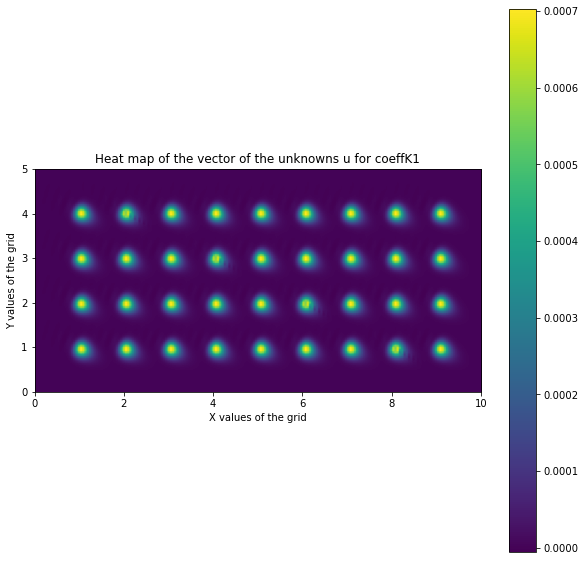

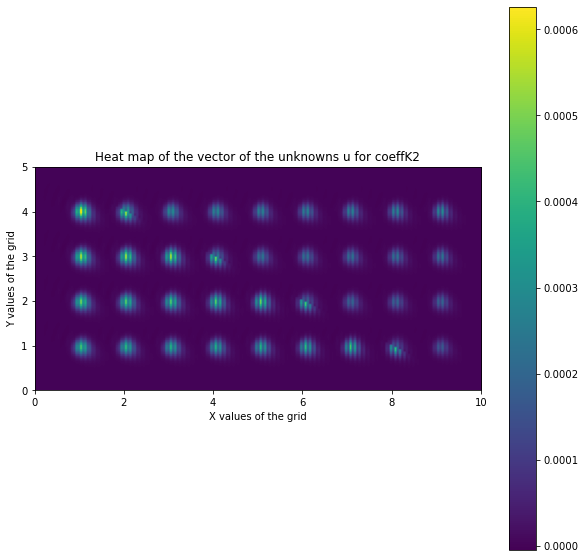

In [17]:
#2.
Nx=200
Ny=100
dx = (RightX-LeftX)/Nx # grid step in x-direction
dy =(RightY-LeftY)/Ny # grid step in y-direction
x,y = np.mgrid[(LeftX+dx):RightX:dx, (LeftY+dy): RightY:dy]

A1 = create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffK1)
A2 = create2DLFVM(Nx,Ny,LeftX,RightX,LeftY,RightY,coeffK2)
f = sourcefunc(x,y)
fLX = np.reshape(f,((Nx-1)*(Ny-1),1)) # reshape 2D f array into 1D fLX array
u1 = la.spsolve(A1,fLX)
# reshaping the solution vector into 2D array
uArr1 = np.reshape(u1,((Nx-1),(Ny-1)))
# visualizing the solution
plt.figure(3, figsize=(10,10))
plt.clf()
plt.imshow(uArr1.transpose(), extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the vector of the unknowns u for coeffK1')
# additional commands to make your plot look correct
u2 = la.spsolve(A2,fLX)
# reshaping the solution vector into 2D array
uArr2 = np.reshape(u2,((Nx-1),(Ny-1)))
# visualizing the solution
plt.figure(4, figsize=(10,10))
plt.clf()
plt.imshow(uArr2.transpose(), extent=[LeftX,RightX, LeftY,RightY]) # use the f array here
plt.colorbar()
plt.xlabel('X values of the grid')
plt.ylabel('Y values of the grid')
plt.title('Heat map of the vector of the unknowns u for coeffK2')
# additional commands to make your plot look correct
